## 효율적인 메모리 관리


### 빅데이터분석에서의 메모리 관리
- Object(문자열/혼합형)보다는 범주형 
- 범위가 제한적인 정수형
- 최소한의 실수형
- 이진(binary)인 경우 Boolean(True/False)

### pandas DataFrame: 테이블 형태의 데이터 묶음
#### R의 dataframe을 참고
- 행: Index
- 열: Column(같은 데이터 타입)

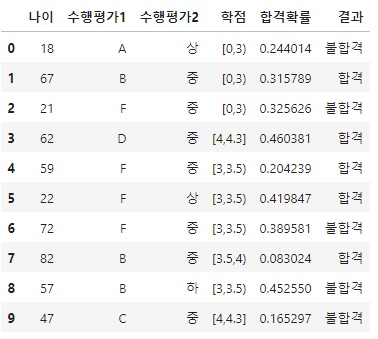

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
def 데이터프레임생성(size):
    df = pd.DataFrame()
    np.random.seed(1906)
    df["나이"] = np.random.choice(100,size)
    df["수행평가1"] = np.random.choice(["A","B","C","D","F"], size)
    df["수행평가2"] = np.random.choice(["상","중","하"], size)    
    df["학점"] = np.random.choice(["[0,3)","[3,3.5)","[3.5,4)","[4,4.3]"], size)
    df["합격확률"] = np.random.uniform(0,1,size)
    df["결과"] = np.random.choice(["합격","불합격"],size)
    return df


In [ ]:
df = 데이터프레임생성(10)
df.head()

In [ ]:
df = 데이터프레임생성(5000000)
# df = 데이터프레임생성(5_000_000)
df1 = df.copy()
df2 = df.copy()
df1.info()


### object(문자열,혼합형)를 category(범주형)로

- category: R(통계학)에서 factor
```R
y <- as.factor(x <- c("A","B","C"))
as.numeric(x)   # NA NA NA
as.numeric(y)   # 1 2 3
``` 
- groupby를 적용할 때 효율적인 데이터 타입

In [ ]:
df2["수행평가1"] = df2["수행평가1"].astype('category')
df2["수행평가2"] = df2["수행평가2"].astype('category')
df2["학점"] = df2["학점"].astype('category')
df2.info()

### Downcastrng
- int8: -128~127
    - uint8: 0~255
- int16: -32,768 ~ 32,767
    - uint16: 0~65,535
- int32: -2,147,483,648~2,147,483,647
    - uint32: 0~ 4,294,967,295
- int64: -9,223,372,036,854,775,808 ~ -9,223,372,036,854,775,807
    - uint64: 0~18,446,744,073,709,551,615

In [ ]:
df2["나이"] = df2["나이"].astype('int8')
df2.info()

In [ ]:
df2["합격확률"] = df2["합격확률"].astype('float32')
df2.info()

### 이진자료를 boolean으로 
- Series.map(): Series에 대해 element-wise로 함수 적용/ 변환이나 매핑에 사용 

In [ ]:
df2["결과"] = df2["결과"].map({"합격":True,"불합격":False})
df2.info()

## groupby 작업수행 시간 비교
- 수행평가1, 학점에 따라 데이터를 나누고 그 안에서 나이의 순위
- 수행평가1, 학점에 따라 데이터를 나누고 그 안에서 합격확률의 순위
- 수행평가1, 학점, 결과에 따라 데이터를 나누고 그 안에서 합격확률의 순위

#### 수행시간계산:  
- %timeit : 7번 반복 작업을 하며 해당 프로그램을 수행하는데 걸린 시간의 평균과 표준편차 계산 
    - % : line command(하나의 라인에 대해 적용)
    - %% : cell command(cepp에 작성된 모든 코드 적용)
- timeit의 옵션
    - -r : loop를 몇 번 할 것인지
    - -n : 각 loop 당 몇 번 실행할 것인지 

In [ ]:
%timeit df1["순위1"] = df1.groupby(["수행평가1","학점"])["나이"].rank()
%timeit df1["순위2"] = df1.groupby(["수행평가1","학점"])["합격확률"].rank()
%timeit df1["순위3"] = df1.groupby(["수행평가1","학점","결과"])["합격확률"].rank()


In [ ]:
%timeit df2["순위1"] = df2.groupby(["수행평가1","학점"])["나이"].rank()
%timeit df2["순위2"] = df2.groupby(["수행평가1","학점"])["합격확률"].rank()
%timeit df2["순위3"] = df2.groupby(["수행평가1","학점","결과"])["합격확률"].rank()

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
## 파일 저장
변수 = ["나이","수행평가1","수행평가2","학점","합격확률","결과"] 
df1 = df1[변수]
df2 = df2[변수]
df1.to_csv("BEP_df1.csv",index=False)
df2.to_csv('BEP_df2.csv',index=False)

In [ ]:
df1csv = pd.read_csv('BEP_df1.csv')
df1csv.head()

In [ ]:
df1csv.info()

In [ ]:
df2csv = pd.read_csv('BEP_df2.csv')
df2csv.head()

In [ ]:
df2csv.info()

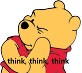
- CSV로 데이터를 저장하면 category, downcasting 정보가 사라짐
- 데이터프레임의 칼럼 이름과 데이터 타입을 정의한 스키마(schema)를 같이 저장할 수 있는 파일로 저장 